<center><font size="10"> 🔥PCA with Linear AutoEncoder🔥 </font></center>

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Lets create a 3d dataset

In [35]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [37]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 9ms/step - loss: 0.5261
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2123
Epoch 3/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1041
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2099
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1025
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0.

In [38]:
codings = encoder.predict(X_train)

2/2 [==============================] - 0s 5ms/step


In [39]:
codings

array([[ 0.5025162 , -1.5058746 ],
       [-0.43717307,  0.09712987],
       [ 0.43014008, -1.4066484 ],
       [-0.34602436, -1.0522826 ],
       [-0.28314552, -0.78329396],
       [ 0.17288522,  1.497042  ],
       [ 0.562403  , -1.4600837 ],
       [ 0.7378364 ,  0.6542683 ],
       [-0.10641023,  1.5125992 ],
       [-0.37721285,  0.8745882 ],
       [-0.118155  , -1.2635431 ],
       [ 0.29239425,  1.3577249 ],
       [ 0.18315728, -1.3534555 ],
       [ 0.43830976, -1.3435698 ],
       [ 0.39115754,  1.3121278 ],
       [-0.41102898, -0.30934882],
       [ 0.7583855 ,  0.64414406],
       [-0.36178342,  1.0419157 ],
       [ 0.7024748 ,  0.9055819 ],
       [ 0.44873777, -1.6153784 ],
       [-0.41818932,  0.9338463 ],
       [ 0.6556806 , -1.5650187 ],
       [-0.0917413 , -1.2821634 ],
       [ 0.2008637 , -1.5029497 ],
       [ 0.38456956,  1.4931848 ],
       [ 0.69563097,  0.9744975 ],
       [-0.51993   , -0.18741474],
       [ 0.32739776,  1.3704534 ],
       [-0.254678  ,

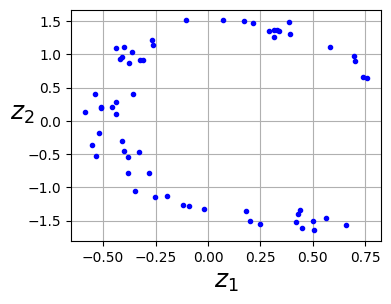

In [40]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Stacked AutoEncoders

#### Lets use Fashion MNIST

In [41]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [42]:
stacked_encoder = keras.models.Sequential([
                keras.layers.Flatten(input_shape = [28,28]),
                keras.layers.Dense(100, activation = 'selu'),
                keras.layers.Dense(30, activation = 'selu'),
                ])

stacked_decoder = keras.models.Sequential([
                keras.layers.Dense(100, activation = 'selu', input_shape = [30]),
                keras.layers.Dense(28*28, activation = 'sigmoid'),
                keras.layers.Reshape([28,28])
                ])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])


In [43]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [44]:
stacked_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 1.5), metrics = [rounded_accuracy])

In [45]:
history = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=[X_valid, X_valid])

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3365 - rounded_accuracy: 0.8888 - val_loss: 0.3117 - val_rounded_accuracy: 0.9126
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3048 - rounded_accuracy: 0.9162 - val_loss: 0.3025 - val_rounded_accuracy: 0.9218
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2973 - rounded_accuracy: 0.9227 - val_loss: 0.2958 - val_rounded_accuracy: 0.9246
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2930 - rounded_accuracy: 0.9266 - val_loss: 0.2922 - val_rounded_accuracy: 0.9300
Epoch 5/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2902 - rounded_accuracy: 0.9292 - val_loss: 0.2902 - val_rounded_accuracy: 0.9300
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2884 - rounded_accuracy: 0.9308 - val_loss: 0.2886 - val_rounded_accuracy: 0.9314
Epoch 7/20
1719/1719 [============

In [46]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [47]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 70ms/step


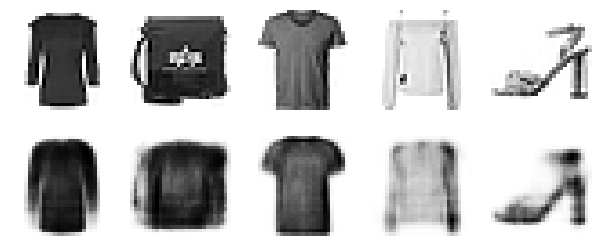

In [48]:
show_reconstructions(stacked_ae)


In [49]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

157/157 [==============================] - 0s 2ms/step


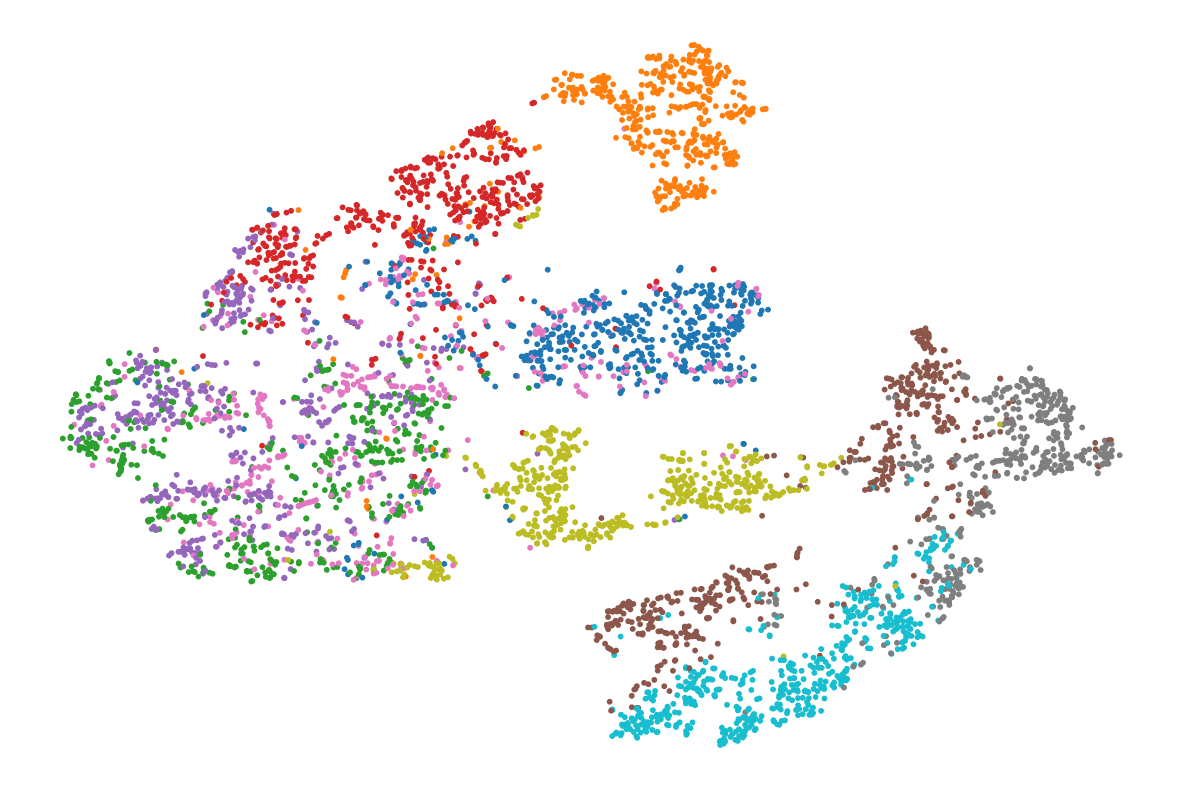

In [50]:
plt.figure(figsize = (15,10))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c = y_valid, s = 10, cmap = "tab10")
plt.axis("off")
plt.show()

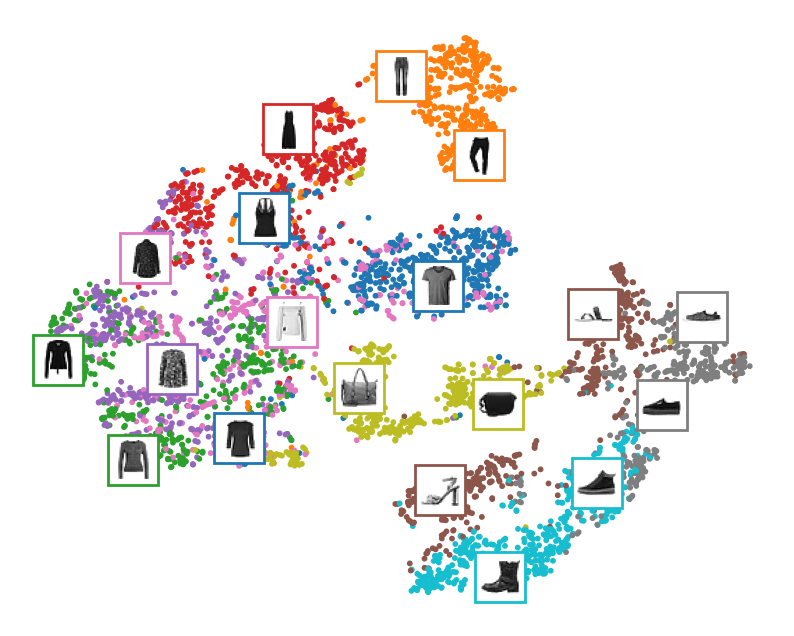

In [51]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

## Convolutional AutoEncoders

In [53]:
tf.random.set_seed(42)
np.random.seed(42)



conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu", input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [54]:
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])


history = conv_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 25s 12ms/step - loss: 0.3017 - rounded_accuracy: 0.9185 - val_loss: 0.2820 - val_rounded_accuracy: 0.9340
Epoch 2/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2761 - rounded_accuracy: 0.9406 - val_loss: 0.2737 - val_rounded_accuracy: 0.9463
Epoch 3/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2712 - rounded_accuracy: 0.9457 - val_loss: 0.2752 - val_rounded_accuracy: 0.9379
Epoch 4/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2687 - rounded_accuracy: 0.9484 - val_loss: 0.2684 - val_rounded_accuracy: 0.9498
Epoch 5/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2668 - rounded_accuracy: 0.9504 - val_loss: 0.2673 - val_rounded_accuracy: 0.9504
Epoch 6/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2655 - rounded_accuracy: 0.9518 - val_loss: 0.2659 - val_rounded_accuracy: 0.9532
Epoch 7/10
1719/1719 [======

1/1 [==============================] - 0s 157ms/step


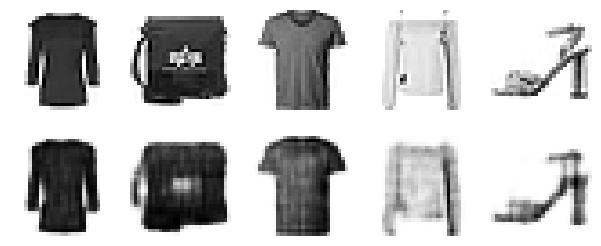

In [55]:
show_reconstructions(conv_ae)
plt.show()

In [57]:
recurrent_encoder = keras.models.Sequential([
                    keras.layers.LSTM(100, return_sequences = True, input_shape = [28,28]),
                    keras.layers.LSTM(30)
                    ])

recurrent_decoder = keras.models.Sequential([
                    keras.layers.RepeatVector(28, input_shape = [30]),
                    keras.layers.LSTM(100, return_sequences = True),
                    keras.layers.TimeDistributed(keras.layers.Dense(28, activation = 'sigmoid'))
])

recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.SGD(0.1), metrics = [rounded_accuracy])

In [58]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 35s 17ms/step - loss: 0.5233 - rounded_accuracy: 0.7389 - val_loss: 0.4575 - val_rounded_accuracy: 0.8076
Epoch 2/10
1719/1719 [==============================] - 32s 19ms/step - loss: 0.4119 - rounded_accuracy: 0.8366 - val_loss: 0.3791 - val_rounded_accuracy: 0.8537
Epoch 3/10
1719/1719 [==============================] - 37s 22ms/step - loss: 0.3677 - rounded_accuracy: 0.8673 - val_loss: 0.3629 - val_rounded_accuracy: 0.8713
Epoch 4/10
1719/1719 [==============================] - 40s 23ms/step - loss: 0.3543 - rounded_accuracy: 0.8783 - val_loss: 0.3533 - val_rounded_accuracy: 0.8792
Epoch 5/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3431 - rounded_accuracy: 0.8857 - val_loss: 0.3442 - val_rounded_accuracy: 0.8812
Epoch 6/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.3351 - rounded_accuracy: 0.8911 - val_loss: 0.3321 - val_rounded_accuracy: 0.8945
Epoch 7/10
1719/1719 [======

1/1 [==============================] - 1s 1s/step


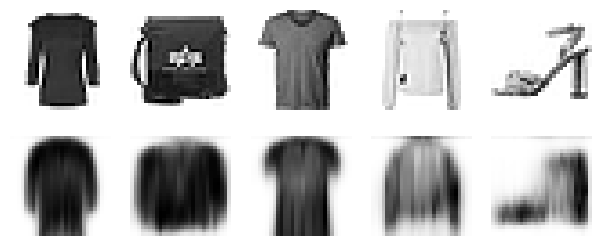

In [59]:
show_reconstructions(recurrent_ae)
plt.show()

## Stacked denoising AutoEncoder

In [60]:
denoising_encoder = keras.models.Sequential([
                keras.layers.Flatten(input_shape = [28, 28]),
                keras.layers.GaussianNoise(0.2),
                keras.layers.Dense(100, activation = "selu"),
                keras.layers.Dense(30, activation = "selu")
])

denoising_decoder = keras.models.Sequential([
                    keras.layers.Dense(100, activation = "selu", input_shape = [30]),
                    keras.layers.Dense(28*28, activation = 'sigmoid'),
                    keras.layers.Reshape([28, 28])
])

denoising_ae = keras.Sequential([denoising_encoder, denoising_decoder])



In [61]:
denoising_ae.compile(loss = "binary_crossentropy", optimizer = keras.optimizers.SGD(learning_rate = 1.0), metrics = [rounded_accuracy])

history = denoising_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3485 - rounded_accuracy: 0.8784 - val_loss: 0.3179 - val_rounded_accuracy: 0.9049
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3122 - rounded_accuracy: 0.9095 - val_loss: 0.3098 - val_rounded_accuracy: 0.9150
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3056 - rounded_accuracy: 0.9151 - val_loss: 0.3032 - val_rounded_accuracy: 0.9177
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3019 - rounded_accuracy: 0.9183 - val_loss: 0.2995 - val_rounded_accuracy: 0.9220
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2990 - rounded_accuracy: 0.9207 - val_loss: 0.2973 - val_rounded_accuracy: 0.9237
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2971 - rounded_accuracy: 0.9225 - val_loss: 0.2955 - val_rounded_accuracy: 0.9261
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 66ms/step


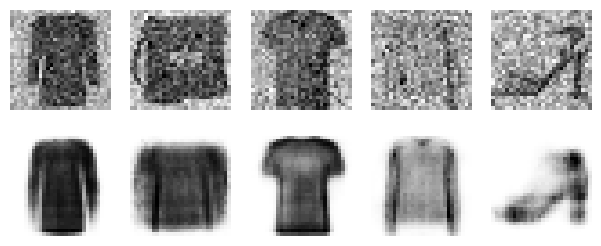

In [62]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

## Sparcity AutoEncoders

In [65]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])

In [66]:
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=[rounded_accuracy])

history = sparse_l1_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4327 - rounded_accuracy: 0.8131 - val_loss: 0.3825 - val_rounded_accuracy: 0.8519
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3691 - rounded_accuracy: 0.8688 - val_loss: 0.3639 - val_rounded_accuracy: 0.8752
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3545 - rounded_accuracy: 0.8799 - val_loss: 0.3509 - val_rounded_accuracy: 0.8803
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3440 - rounded_accuracy: 0.8868 - val_loss: 0.3427 - val_rounded_accuracy: 0.8893
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3381 - rounded_accuracy: 0.8906 - val_loss: 0.3378 - val_rounded_accuracy: 0.8922
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3324 - rounded_accuracy: 0.8957 - val_loss: 0.3309 - val_rounded_accuracy: 0.8996
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 76ms/step


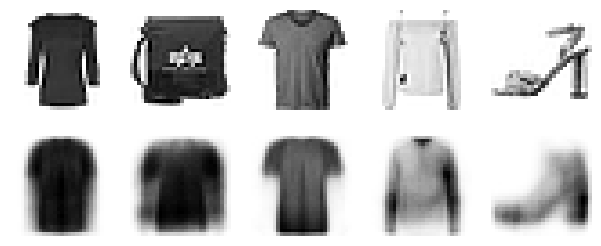

In [67]:
show_reconstructions(sparse_l1_ae)

In [73]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)


def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

In [70]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence


class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (kl_divergence(self.target, mean_activities) + kl_divergence(1. - self.target, 1. - mean_activities))

In [71]:
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4152 - rounded_accuracy: 0.8109 - val_loss: 0.3712 - val_rounded_accuracy: 0.8579
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3526 - rounded_accuracy: 0.8770 - val_loss: 0.3427 - val_rounded_accuracy: 0.8864
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3322 - rounded_accuracy: 0.8939 - val_loss: 0.3268 - val_rounded_accuracy: 0.9000
Epoch 4/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3208 - rounded_accuracy: 0.9035 - val_loss: 0.3202 - val_rounded_accuracy: 0.9051
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3159 - rounded_accuracy: 0.9074 - val_loss: 0.3161 - val_rounded_accuracy: 0.9089
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3125 - rounded_accuracy: 0.9104 - val_loss: 0.3129 - val_rounded_accuracy: 0.9110
Epoch 7/10
1719/1719 [============

1/1 [==============================] - 0s 105ms/step


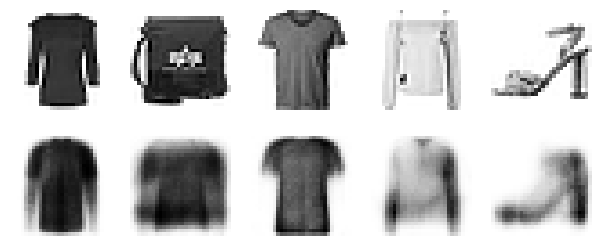

In [72]:
show_reconstructions(sparse_kl_ae)

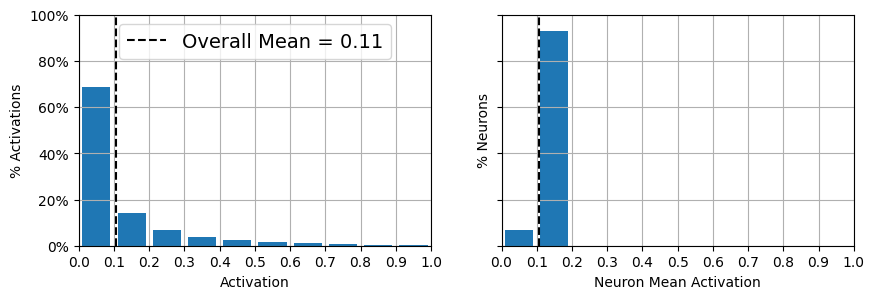

In [74]:
plot_activations_histogram(sparse_kl_encoder)
plt.show()

## Varriation AutoEncoder

In [75]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [78]:
codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [84]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128,
                                validation_data=(X_valid, X_valid))

Epoch 1/50
430/430 [==============================] - 7s 13ms/step - loss: 0.3572 - rounded_accuracy: 0.8876 - val_loss: 0.3347 - val_rounded_accuracy: 0.9098
Epoch 2/50
430/430 [==============================] - 6s 13ms/step - loss: 0.3295 - rounded_accuracy: 0.9090 - val_loss: 0.3276 - val_rounded_accuracy: 0.9127
Epoch 3/50
430/430 [==============================] - 6s 13ms/step - loss: 0.3227 - rounded_accuracy: 0.9132 - val_loss: 0.3232 - val_rounded_accuracy: 0.9113
Epoch 4/50
430/430 [==============================] - 6s 15ms/step - loss: 0.3196 - rounded_accuracy: 0.9156 - val_loss: 0.3188 - val_rounded_accuracy: 0.9166
Epoch 5/50
430/430 [==============================] - 7s 16ms/step - loss: 0.3179 - rounded_accuracy: 0.9170 - val_loss: 0.3210 - val_rounded_accuracy: 0.9167
Epoch 6/50
430/430 [==============================] - 7s 15ms/step - loss: 0.3167 - rounded_accuracy: 0.9179 - val_loss: 0.3189 - val_rounded_accuracy: 0.9180
Epoch 7/50
430/430 [==========================

1/1 [==============================] - 0s 146ms/step


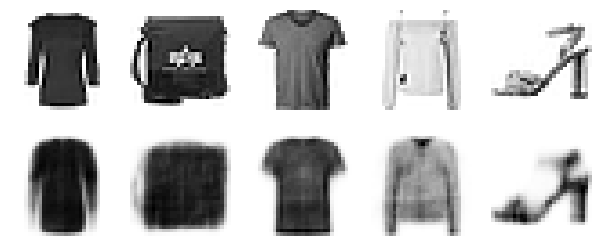

In [80]:
show_reconstructions(variational_ae)
plt.show()

### Generate Fashion Images

In [81]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

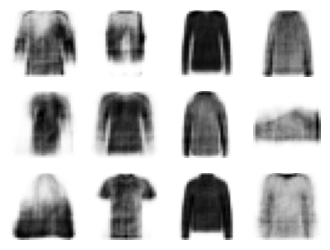

In [83]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
